In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from time import time

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
from sklearn.model_selection import cross_val_predict
#import scikitplot as skplt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

In [ ]:
def PCA_models( models,parameters):
    #ορίζουμε pca
        pca = PCA()   
    #split χωςρις να εχουμε κανει dimentionality reduction
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, 
                                                            shuffle=True,stratify=y1)
    #το number του iteration βασει του οποιου θα ταιραξει classifier & parameters
        i=0
    #το πινακακι που θα εχω τα αποτελεσματα του καθε classifier
        global results3
        results3=pd.DataFrame(columns=["Methodology","Score",])  
    #for loop
        for classifier in models:
    #πρώτα τρ΄΄΄εχω το pipeline με  steps    
            pipe = Pipeline(steps=[("pca", pca), ('classifier', classifier) ])
            pipe.fit(X_train, y_train)
            y_true, y_pred = y_test , pipe.predict(X_test)
    #https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
    #δεν το χρησιμοποιηση με τον ίδιο τροπο και δεν ειμαι σιγουρος αν ειναι σωστο
            #X_digits, y_digits = datasets.load_digits(return_X_y=True)
     #κάνω grid search για τα parameters του pipeline       
            
            grid = GridSearchCV(pipe, parameters[i] ,scoring='balanced_accuracy').fit(X_train, y_train)
    #βρισκω τους καλυτερους παραμετρους του pipe
            best_params = grid.best_params_
            optimised_pipe = grid.best_estimator_
            print(optimised_pipe)
    #ξανατρέχω το optimised pipe
            pipe1 = Pipeline([ ( 'pipe', optimised_pipe ) ])
            optimised_pipe.fit(X_train, y_train)
    ########έχει παρει το dimentionality reduction (PCA απο το optimised pipe)?
            y_true1, y_pred1 = y_test , optimised_pipe.predict(X_test)
            print(pd.DataFrame(X_test).head(1))
            print(pd.DataFrame(X_train).head(1))
    #cross validate        
            scores = cross_validate(optimised_pipe, X1, y1, cv=10,
                    scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                    return_train_score=True)
     # το πινακακι με τα results   
            results3 = results3.append({
                'Methodology': 'PCA Grind'+str(classifier).split('(')[0],
                'Score': format(optimised_pipe.score(X_test, y_test),'.2f'),
                'precision 1': format(precision_score(y_true1, y_pred1,  pos_label=1 , average='binary'),'.2f'),
                'Precision 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][0],'.2f'),
                'Precision 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][1],'.2f'),
                'F1 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][0],'.2f'),
                'F1 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][1],'.2f'),
                'Recal 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][0],'.2f'),
                'Recal 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][1],'.2f'),
                'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
                'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
                'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
                'best params': best_params,
                },ignore_index=True)
            i+=1
        return results3  


    

In [ ]:
def models_no_dim( models,parameters):
       
    #split χωςρις να εχουμε κανει dimentionality reduction
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, 
                                                            shuffle=True,stratify=y1)
    #το number του iteration βασει του οποιου θα ταιραξει classifier & parameters
        i=0
    #το πινακακι που θα εχω τα αποτελεσματα του καθε classifier
        global results4
        results4=pd.DataFrame(columns=["Methodology","Score",])  
    #for loop
        for classifier in models:
    #πρώτα τρ΄΄΄εχω το pipeline με  steps    
            pipe = Pipeline([('classifier', classifier) ])
            pipe.fit(X_train, y_train)
            y_true, y_pred = y_test , pipe.predict(X_test)
    #https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
    #δεν το χρησιμοποιηση με τον ίδιο τροπο και δεν ειμαι σιγουρος αν ειναι σωστο
            #X_digits, y_digits = datasets.load_digits(return_X_y=True)
     #κάνω grid search για τα parameters του pipeline       
            
            grid = GridSearchCV(pipe, parameters[i] ,scoring='balanced_accuracy').fit(X_train, y_train)
    #βρισκω τους καλυτερους παραμετρους του pipe
            best_params = grid.best_params_
            optimised_pipe = grid.best_estimator_
            print(optimised_pipe)
    #ξανατρέχω το optimised pipe
            optimised_pipe.fit(X_train, y_train)

            y_true1, y_pred1 = y_test , optimised_pipe.predict(X_test)
    #cross validate        
            scores = cross_validate(optimised_pipe, X1, y1, cv=10,
                    scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                    return_train_score=True)
     # το πινακακι με τα results   
            results4 = results4.append({
                'Methodology': 'Grind'+str(classifier).split('(')[0],
                'Score': format(optimised_pipe.score(X_test, y_test),'.2f'),
                'precision 1': format(precision_score(y_true1, y_pred1,  pos_label=1 , average='binary'),'.2f'),
                'Precision 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][0],'.2f'),
                'Precision 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][1],'.2f'),
                'F1 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][0],'.2f'),
                'F1 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][1],'.2f'),
                'Recal 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][0],'.2f'),
                'Recal 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][1],'.2f'),
                'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
                'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
                'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
                'best params': best_params,
                },ignore_index=True)
            i+=1
        return results4 


In [ ]:
def PCA_models_method( models,parameters,method_details):
    #ορίζουμε pca
        pca = PCA()   
    #split χωςρις να εχουμε κανει dimentionality reduction
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, 
                                                            shuffle=True,stratify=y1)
    #το number του iteration βασει του οποιου θα ταιραξει classifier & parameters
        i=0
    #το πινακακι που θα εχω τα αποτελεσματα του καθε classifier
        global results5
        results5=pd.DataFrame(columns=["Methodology","Score",])  
    #for loop
        for classifier in models:
    #πρώτα τρ΄΄΄εχω το pipeline με  steps    
            pipe = Pipeline(steps=[("pca", pca), ('classifier', classifier) ])
            pipe.fit(X_train, y_train)
            y_true, y_pred = y_test , pipe.predict(X_test)
    #https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
    #δεν το χρησιμοποιηση με τον ίδιο τροπο και δεν ειμαι σιγουρος αν ειναι σωστο
            #X_digits, y_digits = datasets.load_digits(return_X_y=True)
     #κάνω grid search για τα parameters του pipeline       
            
            grid = GridSearchCV(pipe, parameters[i] ,scoring='balanced_accuracy').fit(X_train, y_train)
    #βρισκω τους καλυτερους παραμετρους του pipe
            best_params = grid.best_params_
            optimised_pipe = grid.best_estimator_
    #ξανατρέχω το optimised pipe
            pipe1 = Pipeline([ ( 'pipe', optimised_pipe ) ])
            optimised_pipe.fit(X_train, y_train)
    ########έχει παρει το dimentionality reduction (PCA απο το optimised pipe)?
            y_true1, y_pred1 = y_test , optimised_pipe.predict(X_test)
    #cross validate        
            scores = cross_validate(optimised_pipe, X1, y1, cv=10,
                    scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                    return_train_score=True)
     # το πινακακι με τα results   
            results5 = results5.append({
                'Methodology': 'PCA Grind'+method_details+str(classifier).split('(')[0],
                'Score': format(optimised_pipe.score(X_test, y_test),'.2f'),
                'precision 1': format(precision_score(y_true1, y_pred1,  pos_label=1 , average='binary'),'.2f'),
                'Precision 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][0],'.2f'),
                'Precision 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][1],'.2f'),
                'F1 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][0],'.2f'),
                'F1 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][1],'.2f'),
                'Recal 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][0],'.2f'),
                'Recal 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][1],'.2f'),
                'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
                'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
                'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
                'best params': best_params,
                },ignore_index=True)
            i+=1
        return results5  
    

    #ειναι σωστο το function? παιρνει τα pca?

In [ ]:
def models_no_dim_method( models,parameters,method_details):

    #split χωςρις να εχουμε κανει dimentionality reduction
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, 
                                                            shuffle=True,stratify=y1)
    #το number του iteration βασει του οποιου θα ταιραξει classifier & parameters
        i=0
    #το πινακακι που θα εχω τα αποτελεσματα του καθε classifier
        global results6
        results6=pd.DataFrame(columns=["Methodology","Score",])  
    #for loop
        for classifier in models:
    #πρώτα τρ΄΄΄εχω το pipeline με  steps    
            pipe = Pipeline([('classifier', classifier) ])
            pipe.fit(X_train, y_train)
            y_true, y_pred = y_test , pipe.predict(X_test)
    #https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
    #δεν το χρησιμοποιηση με τον ίδιο τροπο και δεν ειμαι σιγουρος αν ειναι σωστο
            #X_digits, y_digits = datasets.load_digits(return_X_y=True)
     #κάνω grid search για τα parameters του pipeline       
            
            grid = GridSearchCV(pipe, parameters[i] ,scoring='balanced_accuracy').fit(X_train, y_train)
    #βρισκω τους καλυτερους παραμετρους του pipe
            best_params = grid.best_params_
            optimised_pipe = grid.best_estimator_
            print(optimised_pipe)
    #ξανατρέχω το optimised pipe
            optimised_pipe.fit(X_train, y_train)
    ########έχει παρει το dimentionality reduction (PCA απο το optimised pipe)?
            y_true1, y_pred1 = y_test , optimised_pipe.predict(X_test)
    #cross validate        
            scores = cross_validate(optimised_pipe, X1, y1, cv=10,
                    scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                    return_train_score=True)
     # το πινακακι με τα results   
            results6 = results4.append({
                'Methodology': 'Grind'+method_details+str(classifier).split('(')[0],
                'Score': format(optimised_pipe.score(X_test, y_test),'.2f'),
                'precision 1': format(precision_score(y_true1, y_pred1,  pos_label=1 , average='binary'),'.2f'),
                'Precision 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][0],'.2f'),
                'Precision 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[0][1],'.2f'),
                'F1 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][0],'.2f'),
                'F1 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[2][1],'.2f'),
                'Recal 0':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][0],'.2f'),
                'Recal 1':format(precision_recall_fscore_support(y_true1, y_pred1, average=None)[1][1],'.2f'),
                'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
                'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
                'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
                'best params': best_params,
                },ignore_index=True)
            i+=1
        return results6 


https://archive.ics.uci.edu/ml/datasets/wine+quality
Relevant Papers:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [4]:
data=pd.read_csv(r"C:\Users\c.logaras\christos-logaras-exercises\winequality-white (1).csv",sep=';', low_memory=False)
data['Sratio']=data['free sulfur dioxide']/data['total sulfur dioxide']
quality_complete=data['quality'].copy()

In [5]:
data['quality'].replace(to_replace =[7, 8, 9],  value =1,inplace=True)
data['quality'].replace(to_replace =[6, 5,  4, 3,], value =0 ,inplace=True)
data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',  'Sratio','quality']]
data['free sulfur dioxide' ]=data['free sulfur dioxide' ]/100
data['total sulfur dioxide'  ]=data['total sulfur dioxide'  ]/100
data['fixed acidity'  ]=data['fixed acidity'  ]/10
data['residual sugar'  ]=data['residual sugar'  ]/100
data['alcohol'  ]=data['alcohol']/10
data['residual sugar']=data['residual sugar']*10
data['chlorides']=data['chlorides']*10
data['pH']=data['pH']/10
     

In [6]:
# αν εβαζα λευκα και κοκκινα μαζι
#data2=pd.read_csv(r"C:\Users\c.logaras\christos-logaras-exercises\winequality-red.csv", low_memory=False)
#data['type']='white'
#data2['type']='red'
#data=pd.concat([data,data2])
#cols = data.columns.tolist()
#data = data[cols[-1:] + cols[:-1]]
#data.replace(to_replace='red',value=1,inplace= True)
#data.replace(to_replace='white',value=0,inplace= True)
#data.reset_index(drop=True,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  Sratio                4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 497.6 KB


In [8]:
#παρατηρω οτι η ταξη μεγεθους της καθε μεταβλητης ειναι διαφορετική - ίσως επιρρεάσει το μοντέλο 
# να κανω καποια γραμμική μετατροπή (πχ /10) ή μετασχηματισμο οπως normalisation/log κτλ
#π΄ρ'ωτα πρέπει να καταλάβω τις μεταβήτές
#επέισης και 50% και το 75% των παρατηρήσεων μας είναι στο 6- να κανουμε δική μας κατηγοριοποίηση; 

In [9]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sratio,quality
4893,0.62,0.21,0.29,0.16,0.39,0.24,0.92,0.99114,0.327,0.50,1.12,0.260870,0
4894,0.66,0.32,0.36,0.80,0.47,0.57,1.68,0.99490,0.315,0.46,0.96,0.339286,0
4895,0.65,0.24,0.19,0.12,0.41,0.30,1.11,0.99254,0.299,0.46,0.94,0.270270,0
4896,0.55,0.29,0.30,0.11,0.22,0.20,1.10,0.98869,0.334,0.38,1.28,0.181818,1
4897,0.60,0.21,0.38,0.08,0.20,0.22,0.98,0.98941,0.326,0.32,1.18,0.224490,0


In [10]:
#οι περισσότερες (εξατρημενες/ανεξαρτητη) μεταβλητές έχουν παρόμοια κατανομή για κοκκινο/λευκό εκτός απο οτι εχει να κανει με acidity & sugar
#τα κοκκινα κρασια φαίνονται να έχουν πιο πολλα outliers

Sulphites feature in most wines; whites more than reds, and sweet wines significantly more than both. They prevent oxidation (that is, they stop the juice turning brown), they keep wines stable (important when they have to travel) and they preserve their bright, fresh fruit flavours. The downside is that higher levels can, in some people, provoke headaches and breathing difficulties, though headache can of course also be triggered by the amount you drink.

Even if a wine has no added sulphur (often referred to on the label as NAS), it may well contain some naturally occurring or “free sulphur” as a result of the fermentation process. It’s really the total level you need to be concerned about, which, under EU regulations, can be up to 400mg per litre in the case of sweet wines (200mg per litre is the maximum for whites and 150mg for reds). Natural wine bars will generally stock wines that are a good deal lower than that – in the case of Plateau in Brighton, for example, they aim for 30mg per litre.

https://www.decanter.com/learn/wine-terminology/sulfites-in-wine-friend-or-foe-295931/

Wine ranges from about 5 mg/L (5 parts per million) to about 200 mg/L. 

μπορούμε να μετατρέψουμε γραμμικά καποιες μεταβλητες πχ  τις 'free sulfur dioxide' &	'total sulfur dioxide'  αντι mg/L σε cg/L, για να ειναι πιο κοντά στις μοναδες μετρησης των υπολοιπων

<AxesSubplot:>

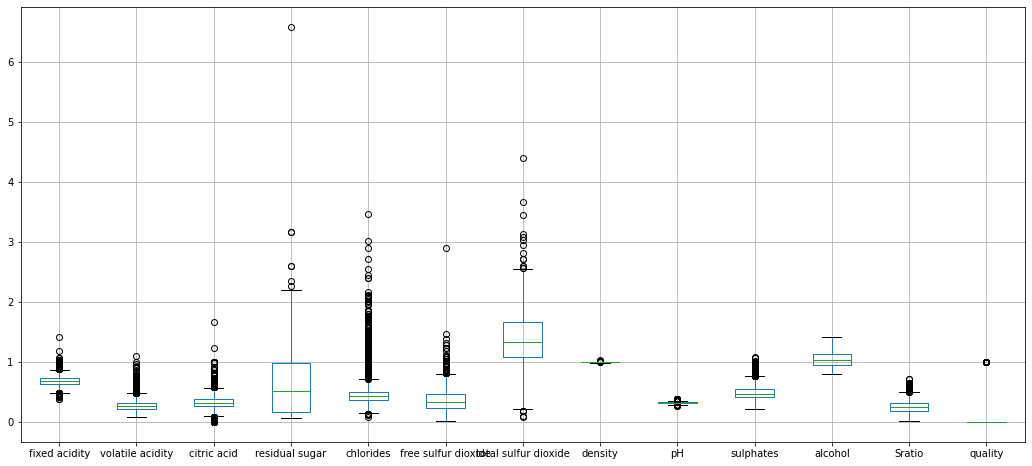

In [11]:
data.boxplot(figsize=[18,8])

In [12]:
#sns.pairplot(data)

τα total και το free sulfur έχουν μεγαλη συσχετιση. 1. να γίνουν δεικτης 2. να γινει καποιο drop. Χρειαζεται να καταλαβουμε καλυτερα σε βαθος τι σημαινουν

https://www.wineshopathome.com/understanding-sulfur-levels-wine/


https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/
Another insight that TSO2 can provide, in conjunction with FSO2, is a sense of how “clean” a wine is. A wine with high TSO2 has usually had many SO2 additions made over its lifetime, usually because the FSO2 keeps dropping. When we see a wine where the FSO2 is an unusually small percentage of the TSO2, it’s often an indication that there’s something making the wine chemically and/or microbially unstable.

άρα θέλω το ratio f/total supphur  και σκετο το total

---------------------

In [13]:
data.quality.unique()

array([0, 1], dtype=int64)

In [14]:
data[data['quality']==1].shape[0]/data.shape[0]

0.21641486320947326

In [15]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sratio,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.139459,-0.080748
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.196161,-0.067225
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,0.016241,-0.035330
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,0.051430,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.033218,-0.183118
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.738632,-0.023413
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.013448,-0.162202
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.065525,-0.283871
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.000801,0.093510
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,-0.022362,0.047410


1. θα κανω split
2. stratified το test
3. θα ξεκινήσω να τρέχω αλγόριθμους

In [16]:
X_original = data.drop('quality', axis=1)
y_original = data['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, shuffle=True,stratify=y_original)

In [18]:
lr = LogisticRegression(max_iter=500)
lr = lr.fit(X_train, y_train)

y_true, y_pred = y_test, lr.predict(X_test)

scores = cross_validate(lr, X_original, y_original, cv=10,
                        scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                        return_train_score=True)

records=pd.DataFrame(columns=["Methodology","Score",])
records = records.append(
    {
        'Methodology': 'Logistic Stratified',
        'Score': format(lr.score(X_test, y_true),'.2f'),
        'Precision 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][0],'.2f'),
        'Precision 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][1],'.2f'),
        'precision 1': format(precision_score(y_true, y_pred,  pos_label=1 , average='binary'),'.2f'),
        #δεν ξέρω αν ειναι σωστο
        'Recal 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][0],'.2f'),
        'Recal 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][1],'.2f'),
        'F1 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][0],'.2f'),
        'F1 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][1],'.2f'),
        'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
        'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
        'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
    },
    ignore_index=True)


In [19]:
records

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79


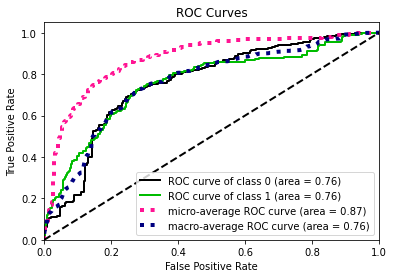

In [20]:
lr_probs = lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, lr_probs)
plt.show()

In [21]:
logit_model = sm.Logit(y_original, X_original)
result1 = logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.426879
         Iterations 7
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.183      
Dependent Variable:   quality            AIC:                4205.7106  
Date:                 2021-12-12 19:54   BIC:                4283.6696  
No. Observations:     4898               Log-Likelihood:     -2090.9    
Df Model:             11                 LL-Null:            -2558.4    
Df Residuals:         4886               LLR p-value:        1.7927e-193
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       7.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
fixed acidity          0.8514   0.5616   1.5160 0.1

Άρα βλέπω οτι  fixed acidity  &  total sulfur dioxide δεν δινουν επεξηγηματική δυναμη στο μοντελο

In [22]:
cols = ['volatile acidity', 'citric acid', 'chlorides','residual sugar',
        'Sratio','density','pH','sulphates','alcohol']
X_feat = data[cols]
y_feat = data['quality']

In [23]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(
    X_feat, y_feat, test_size=0.2, random_state=42, shuffle=True, stratify=y_original)

In [24]:
lr = LogisticRegression(max_iter=500)
lr = lr.fit(X_new_train, y_new_train)

y_true_new, y_pred_new = y_new_test, lr.predict(X_new_test)

scores = cross_validate(lr, X_feat, y_feat, cv=10,
                        scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                        return_train_score=True)

results = records.append(
    {
        'Methodology': 'Logistic Stratified with specfic variables',
        'Score': format(lr.score(X_new_test, y_new_test),'.2f'),
        'Precision 0':format(precision_recall_fscore_support(y_true_new, y_pred_new, average=None)[0][0],'.2f'),
        'Precision 1':format(precision_recall_fscore_support(y_true_new, y_pred_new, average=None)[0][1],'.2f'),
        'precision 1': format(precision_score(y_true, y_pred,  pos_label=1 , average='binary'),'.2f'),
        #
        'Recal 0':format(precision_recall_fscore_support(y_true_new, y_pred_new, average=None)[1][0],'.2f'),
        'Recal 1':format(precision_recall_fscore_support(y_true_new, y_pred_new, average=None)[1][1],'.2f'),
        'F1 0':format(precision_recall_fscore_support(y_true_new, y_pred_new, average=None)[2][0],'.2f'),
        'F1 1':format(precision_recall_fscore_support(y_true_new, y_pred_new, average=None)[2][1],'.2f'),
        'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
        'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
        'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
    },
    ignore_index=True)
#results = records2

In [25]:
results
#αφαιρόντας τις μεταβλητές δεν ΄άλλαξαν τα αποτελέσματα

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79


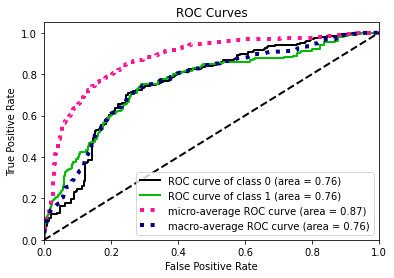

In [26]:
lr_probs = lr.predict_proba(X_new_test)
skplt.metrics.plot_roc(y_new_test, lr_probs)
plt.show()

In [27]:
#άρα έχουμε δει οτι θελουμε ολες τις μεταβλητές(βγαζοντας 2 μεταβλητές δεν άλλαξε το πορισμα) . Προσοχη αρχικό split test & train
#Στο ΄ίδιο μοντέλο (logistic) θα παίξουμε με pipeline

In [28]:
scalers=[MinMaxScaler(),StandardScaler(),RobustScaler(),
        Normalizer(),QuantileTransformer(),PowerTransformer()]

for scaler in scalers:
    pipe = Pipeline([
                     ('scaler', scaler), 
                     ('classifier', LogisticRegression())
                     ])

    pipe.fit(X_train, y_train)
    y_true, y_pred = y_test , pipe.predict(X_test)
    
    scores = cross_validate(pipe, X_original, y_original, cv=10,
                        scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                        return_train_score=True)

    results = results.append(
        {
            'Methodology': 'Logistic Str '+str(scaler).split('(')[0],
            'Score': format(pipe.score(X_test, y_test),'.2f'),
            'Precision 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][0],'.2f'),
            'Precision 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][1],'.2f'),
            'precision 1': format(precision_score(y_true, y_pred,  pos_label=1 , average='binary'),'.2f'),
        #
            'Recal 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][0],'.2f'),
            'Recal 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][1],'.2f'),
            'F1 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][0],'.2f'),
            'F1 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][1],'.2f'),
            'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
            'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
            'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f'),
        },
        ignore_index=True)
  

C:\Users\c.logaras\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\c.logaras\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\c.logaras\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [29]:
 results

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80


In [30]:
#ίσως ο Standard scaler βελτιωνει την προβλεπτική ικανότητα - οχι ομως για το precision-1

In [31]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Sratio', 'quality'],
      dtype='object')

επόμενο βήμα να παιξουμε με τους classifiers

μετα με grid search στο επικρατεστερο classifier

μετα dimentionality reduction (pca, svdm, t-sne, outlier detection)


In [32]:
cols1=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Sratio']
ss = StandardScaler()
'''fit scaler on numeric features'''
ss.fit(data[cols1])
'''scale numeric features now'''
X1 = ss.transform(data[cols1])
y1=data['quality']

In [33]:
par={ 
    0:{'classifier__C':[0.1, 0.5, 1.0, 2.0, 4.0],
               'classifier__solver':['newton-cg', 'lbfgs'],
        "pca__n_components": [5,7,9,10,11]},
            1:{'classifier__n_estimators':[50,100,300],
               'classifier__criterion':['gini','entropy'],
              "pca__n_components": [5,7,9,10,11]},
            2:{'classifier__C':[0.1, 0.5, 0.8, 1 , 1.4, 2.0, 4.0],
               'classifier__kernel':['linear', 'rbf'],
               'classifier__gamma' :[0.1,1,1.4],
               "pca__n_components": [5,7,9,10,11]}}

clas=[
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=5),
    SVC(class_weight='balanced')] 

In [35]:
PCA_models(clas,par)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('classifier',
                 LogisticRegression(C=2.0, max_iter=1000, solver='newton-cg'))])
         0         1        2         3         4         5        6   \
0 -1.013043 -1.073988  0.21328 -0.925047 -0.172682 -1.253019 -1.82052   

         7         8         9        10        11  
0 -0.865169  0.210175  0.439499  0.23221 -0.277356  
         0         1         2         3         4        5         6   \
0 -0.538987  0.315117 -0.613115  1.342508  0.010421  1.27559  1.568216   

         7         8        9         10        11  
0  1.161179 -0.120983 -0.69971 -0.743008  0.239087  
Pipeline(steps=[('pca', PCA(n_components=11)),
                ('classifier', RandomForestClassifier(criterion='entropy'))])
         0         1        2         3         4         5        6   \
0 -1.013043 -1.073988  0.21328 -0.925047 -0.172682 -1.253019 -1.82052   

         7         8         9        10        11  
0 -0.865

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,"{'classifier__C': 2.0, 'classifier__solver': '...",0.57,0.54,0.60,0.79
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,"{'classifier__criterion': 'entropy', 'classifi...",0.84,0.58,0.63,0.82
2,PCA GrindSVC,0.77,0.84,0.61,0.94,0.48,0.75,0.84,"{'classifier__C': 4.0, 'classifier__gamma': 0....",0.48,0.52,0.74,0.81


In [36]:
print(results3['best params'][2])

{'classifier__C': 4.0, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'pca__n_components': 10}


In [37]:
results= results.append(results3)

In [38]:
results

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


#Μετα θα δοκιμάσω και χωρις PCA

In [39]:
par1={ 
    0:{'classifier__C':[0.1, 0.5, 1.0, 2.0, 4.0],
               'classifier__solver':['newton-cg', 'lbfgs']},
            1:{'classifier__n_estimators':[50, 100, 300],
               'classifier__criterion':['gini','entropy']},
            2:{'classifier__C':[0.1, 0.5, 0.8, 1 , 1.4, 2.0, 4.0],
               'classifier__kernel':['linear', 'rbf'],
               'classifier__gamma' :[0.1,1,1.4],}}

clas=[
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=5),
    SVC(class_weight='balanced')] 

In [47]:
models_no_dim(clas,par1)

Pipeline(steps=[('classifier',
                 LogisticRegression(C=2.0, max_iter=1000, solver='newton-cg'))])
Pipeline(steps=[('classifier', RandomForestClassifier(n_estimators=300))])
Pipeline(steps=[('classifier', SVC(C=4.0, class_weight='balanced', gamma=0.1))])


,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,GrindLogisticRegression,0.80,0.88,0.39,0.83,0.60,0.95,0.29,"{'classifier__C': 2.0, 'classifier__solver': '...",0.60,0.54,0.61,0.80
1,GrindRandomForestClassifier,0.90,0.94,0.73,0.91,0.86,0.97,0.64,"{'classifier__criterion': 'gini', 'classifier_...",0.86,0.59,0.64,0.83
2,GrindSVC,0.77,0.84,0.61,0.95,0.48,0.75,0.84,"{'classifier__C': 4.0, 'classifier__gamma': 0....",0.48,0.53,0.74,0.81


In [48]:
results = results.append(results4)

In [49]:
results

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


#Μετα θα δοκιμάσω και με τους κατωθι classifier
LGBMClassifier
XGBClassifier
GradientBoostingClassifier
AdaBoostClassifier

In [50]:
par2={ 
    0:{'classifier__boosting_type':['gbdt','dart','goss'],
               'classifier__learning_rate':[0.1,0.5,1],
        "pca__n_components": [5,7,9,10,11]},
            1:{'classifier__booster':['gbtree','gblinear','dart'],
        "pca__n_components": [5,7,9,10,11]},
            2:{'classifier__loss':['deviance', 'exponential'],
               'classifier__learning_rate':[0.1,0.5,1],
        "pca__n_components": [5,7,9,10,11]},
            3:{'classifier__learning_rate':[0.1,0.5,1],
               'classifier__algorithm':['SAMME', 'SAMME.R'],
        "pca__n_components": [5,7,9,10,11]}
}

clas2=[
    LGBMClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
] 


In [51]:
PCA_models(clas2,par2)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('classifier', LGBMClassifier(learning_rate=0.5))])
         0         1        2         3         4         5        6   \
0 -1.013043 -1.073988  0.21328 -0.925047 -0.172682 -1.253019 -1.82052   

         7         8         9        10        11  
0 -0.865169  0.210175  0.439499  0.23221 -0.277356  
         0         1         2         3         4        5         6   \
0 -0.538987  0.315117 -0.613115  1.342508  0.010421  1.27559  1.568216   

         7         8        9         10        11  
0  1.161179 -0.120983 -0.69971 -0.743008  0.239087  


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:03] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:03] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:04] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:04] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:04] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:05] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:05] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:05] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('pca', PCA(n_components=11)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


         0         1        2         3         4         5        6   \
0 -1.013043 -1.073988  0.21328 -0.925047 -0.172682 -1.253019 -1.82052   

         7         8         9        10        11  
0 -0.865169  0.210175  0.439499  0.23221 -0.277356  
         0         1         2         3         4        5         6   \
0 -0.538987  0.315117 -0.613115  1.342508  0.010421  1.27559  1.568216   

         7         8        9         10        11  
0  1.161179 -0.120983 -0.69971 -0.743008  0.239087  
[22:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('pca', PCA(n_components=11)),
                ('classifier', GradientBoostingClassifier(learning_rate=1))])
         0         1        2         3         4         5        6   \
0 -1.013043 -1.073988  0.21328 -0.925047 -0.172682 -1.253019 -1.82052   

         7         8         9        10        11  
0 -0.865169  0.210175  0.439499  0.23221 -0.277356  
         0         1         2         3         4        5         6   \
0 -0.538987  0.315117 -0.613115  1.342508  0.010421  1.27559  1.568216   

         7         8        9         10        11  
0  1.161179 -0.120983 -0.69971 -0.743008  0.239087  
Pipeline(steps=[('pca', PCA(n_components=10)),
          

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,PCA GrindLGBMClassifier,0.88,0.93,0.71,0.91,0.75,0.94,0.68,"{'classifier__boosting_type': 'gbdt', 'classif...",0.75,0.54,0.65,0.80
1,PCA GrindXGBClassifier,0.88,0.92,0.70,0.91,0.76,0.94,0.65,"{'classifier__booster': 'gbtree', 'pca__n_comp...",0.76,0.53,0.64,0.79
2,PCA GrindGradientBoostingClassifier,0.86,0.91,0.67,0.91,0.68,0.91,0.66,"{'classifier__learning_rate': 1, 'classifier__...",0.68,0.44,0.62,0.74
3,PCA GrindAdaBoostClassifier,0.80,0.88,0.43,0.84,0.57,0.93,0.34,"{'classifier__algorithm': 'SAMME.R', 'classifi...",0.57,0.50,0.62,0.77


In [52]:
results= results.append(results3)

In [53]:
results

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


In [54]:
par3={ 
    0:{'classifier__boosting_type':['gbdt','dart','goss'],
               'classifier__learning_rate':[0.1,0.5,1]},
            1:{'classifier__booster':['gbtree','gblinear','dart']},
            2:{'classifier__loss':['deviance', 'exponential'],
               'classifier__learning_rate':[0.1,0.5,1]},
            3:{'classifier__learning_rate':[0.1,0.5,1],
               'classifier__algorithm':['SAMME', 'SAMME.R']}
}

clas3=[
    LGBMClassifier(),
    XGBClassifier(use_label_encoder=False),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
] 

In [55]:
models_no_dim(clas3,par3)

Pipeline(steps=[('classifier', LGBMClassifier(learning_rate=0.5))])
[22:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[2

[22:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
    

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,GrindLGBMClassifier,0.88,0.92,0.71,0.91,0.75,0.94,0.67,"{'classifier__boosting_type': 'gbdt', 'classif...",0.75,0.56,0.66,0.81
1,GrindXGBClassifier,0.88,0.92,0.68,0.90,0.76,0.95,0.61,{'classifier__booster': 'gbtree'},0.76,0.54,0.65,0.81
2,GrindGradientBoostingClassifier,0.85,0.91,0.62,0.88,0.71,0.94,0.56,"{'classifier__learning_rate': 1, 'classifier__...",0.71,0.51,0.65,0.79
3,GrindAdaBoostClassifier,0.82,0.89,0.47,0.85,0.62,0.94,0.38,"{'classifier__algorithm': 'SAMME.R', 'classifi...",0.62,0.51,0.64,0.80


In [56]:
results= results.append(results4)

In [57]:
results.drop_duplicates(subset=['Methodology'])

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


#outliers εππιρεάζουν το αποτέλεσμα

#Upskalling (smote)

#Feature selection

-----------Local Outlier

In [59]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Sratio', 'quality'],
      dtype='object')

In [36]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Sratio']
ss = StandardScaler()
'''fit scaler on numeric features'''
ss.fit(data[cols])
'''scale numeric features now'''
X_Standard= ss.transform(data[cols])

lof = LocalOutlierFactor(n_neighbors=6)
data['anomaly_label']=lof.fit_predict(X_Standard)
data['original']=quality_complete
#plot για να δω αν τα outlier έχουν καποια χαρακτηριστικά

In [37]:
check_out=pd.DataFrame(data.groupby(['original','anomaly_label'])['quality'].count()).reset_index()

In [38]:
import plotly.express as px

In [50]:
fig = px.bar(check_out, x=check_out["original"], y="quality", color="anomaly_label")
fig.show()

In [64]:
#Πο΄'υ βαρύ-> θα χρησιμοποιησω sns
#total_cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol', 'Sratio']
#for i in total_cols:
#    fig = px.violin(data,x='original',y=i, color="anomaly_label", box=True, points="all", hover_data=data.columns)
#    fig.show()

In [40]:
#'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#'pH', 'sulphates', 'alcohol', 'Sratio'
def cont_out(column_nam):
    ax = sns.violinplot(x='original',y=column_nam,data=data, hue="anomaly_label")

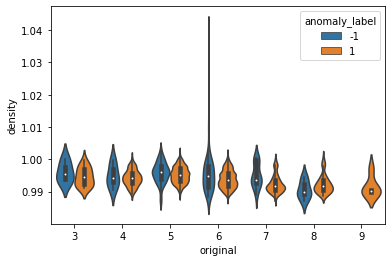

In [48]:
cont_out('density')

In [ ]:
def cont_out(column_nam):
    ax = sns.violinplot(x='original',y=column_nam,data=data, hue="anomaly_label")

In [ ]:
cont_out('chlorides')

#Δεν παρατηρω ενιαιο pattern πχ να εξαιρεί τα χαρακτηριστικά που το κανουν πολύ κακό κρασί, άρα συνεχίζω με την αφαίρεση outlier

In [67]:
data2 = data[data['anomaly_label'] >0]

In [68]:
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sratio,quality,anomaly_label,original
0,0.70,0.27,0.36,2.07,0.45,0.45,1.70,1.0010,0.300,0.45,0.88,0.264706,0,1,6
1,0.63,0.30,0.34,0.16,0.49,0.14,1.32,0.9940,0.330,0.49,0.95,0.106061,0,1,6
2,0.81,0.28,0.40,0.69,0.50,0.30,0.97,0.9951,0.326,0.44,1.01,0.309278,0,1,6
3,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.9956,0.319,0.40,0.99,0.252688,0,1,6
4,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.9956,0.319,0.40,0.99,0.252688,0,1,6


In [69]:
X_locOut = data2.iloc[:,:-3]
y_locOut= data2.iloc[:,-3]

ss = StandardScaler()
'''fit scaler on numeric features'''
ss.fit(X_locOut)
'''scale numeric features now'''
X1= ss.transform(X_locOut)
y1=data2.iloc[:,-3]

In [71]:
PCA_models_method(clas,par,' LocalOutlier StandardScaler')

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,PCA Grind LocalOutlier StandardScalerLogisticR...,0.79,0.88,0.35,0.82,0.55,0.94,0.26,"{'classifier__C': 1.0, 'classifier__solver': '...",0.55,0.55,0.61,0.79
1,PCA Grind LocalOutlier StandardScalerRandomFor...,0.88,0.92,0.66,0.89,0.82,0.96,0.56,"{'classifier__criterion': 'gini', 'classifier_...",0.82,0.58,0.62,0.81
2,PCA Grind LocalOutlier StandardScalerSVC,0.78,0.84,0.62,0.94,0.49,0.76,0.83,"{'classifier__C': 4.0, 'classifier__gamma': 0....",0.49,0.52,0.74,0.81


In [72]:
results= results.append(results5)

In [73]:
PCA_models_method(clas2,par2,' LocalOutlier StandardScaler')

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:59] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:59] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:59] WARNING: C:/Users/Administrator/workspa

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:00] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:57:00] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:00] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:00] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:00] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this wa

[22:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:01] WARNING: C:/Users/Administrator/workspac

C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c.logaras\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,PCA Grind LocalOutlier StandardScalerLGBMClass...,0.87,0.92,0.67,0.90,0.74,0.94,0.62,"{'classifier__boosting_type': 'goss', 'classif...",0.74,0.57,0.65,0.81
1,PCA Grind LocalOutlier StandardScalerXGBClassi...,0.86,0.91,0.66,0.89,0.73,0.94,0.60,"{'classifier__booster': 'gbtree', 'pca__n_comp...",0.73,0.54,0.63,0.80
2,PCA Grind LocalOutlier StandardScalerGradientB...,0.84,0.90,0.61,0.89,0.64,0.91,0.58,"{'classifier__learning_rate': 1, 'classifier__...",0.64,0.45,0.64,0.75
3,PCA Grind LocalOutlier StandardScalerAdaBoostC...,0.78,0.86,0.41,0.83,0.48,0.89,0.36,"{'classifier__algorithm': 'SAMME.R', 'classifi...",0.48,0.50,0.63,0.76


In [74]:
results= results.append(results5)

In [75]:
results.drop_duplicates(subset=['Methodology'])

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


In [77]:
models_no_dim_method(clas,par1,' LocalOutlier Standard')

Pipeline(steps=[('classifier',
                 LogisticRegression(C=4.0, max_iter=1000, solver='newton-cg'))])
Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=300))])
Pipeline(steps=[('classifier', SVC(C=4.0, class_weight='balanced', gamma=0.1))])


,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,GrindLGBMClassifier,0.88,0.92,0.71,0.91,0.75,0.94,0.67,"{'classifier__boosting_type': 'gbdt', 'classif...",0.75,0.56,0.66,0.81
1,GrindXGBClassifier,0.88,0.92,0.68,0.90,0.76,0.95,0.61,{'classifier__booster': 'gbtree'},0.76,0.54,0.65,0.81
2,GrindGradientBoostingClassifier,0.85,0.91,0.62,0.88,0.71,0.94,0.56,"{'classifier__learning_rate': 1, 'classifier__...",0.71,0.51,0.65,0.79
3,GrindAdaBoostClassifier,0.82,0.89,0.47,0.85,0.62,0.94,0.38,"{'classifier__algorithm': 'SAMME.R', 'classifi...",0.62,0.51,0.64,0.80
4,Grind LocalOutlier StandardSVC,0.78,0.84,0.62,0.94,0.50,0.77,0.81,"{'classifier__C': 4.0, 'classifier__gamma': 0....",0.50,0.53,0.75,0.81


In [78]:
results = results.append(results6)

In [79]:
models_no_dim_method(clas3,par3,' LocalOutlier Standard')

Pipeline(steps=[('classifier', LGBMClassifier(learning_rate=1))])
[23:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:

[23:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
    

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,best params,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,GrindLGBMClassifier,0.88,0.92,0.71,0.91,0.75,0.94,0.67,"{'classifier__boosting_type': 'gbdt', 'classif...",0.75,0.56,0.66,0.81
1,GrindXGBClassifier,0.88,0.92,0.68,0.90,0.76,0.95,0.61,{'classifier__booster': 'gbtree'},0.76,0.54,0.65,0.81
2,GrindGradientBoostingClassifier,0.85,0.91,0.62,0.88,0.71,0.94,0.56,"{'classifier__learning_rate': 1, 'classifier__...",0.71,0.51,0.65,0.79
3,GrindAdaBoostClassifier,0.82,0.89,0.47,0.85,0.62,0.94,0.38,"{'classifier__algorithm': 'SAMME.R', 'classifi...",0.62,0.51,0.64,0.80
4,Grind LocalOutlier StandardAdaBoostClassifier,0.81,0.88,0.49,0.85,0.60,0.92,0.42,"{'classifier__algorithm': 'SAMME.R', 'classifi...",0.60,0.51,0.64,0.79


In [80]:
results = results.append(results6)

In [81]:
results.drop_duplicates(subset=['Methodology'])

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
0,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
1,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


In [82]:
results.to_excel("wine_no_over_sampling.xlsx",sheet_name='white_wine')  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12,)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)
preds = clf_rf.predict(X_test)
print(classification_report(y_test, preds))
fis_df = pd.DataFrame(fis)
fis_df.sort_values(by =0, ascending = False ).head(25)

In [110]:
sm = SMOTE(sampling_strategy=0.35, random_state=12)
X_1=data.iloc[:,:-3]
Y_1=data.iloc[:,-3]
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42, 
                                                            shuffle=True,stratify=Y_1)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [111]:
pipe = Pipeline(steps=[("scaler",StandardScaler()), ('classifier', RandomForestClassifier(criterion='gini', n_estimators= 300)) ])
pipe.fit(x_train_res, y_train_res)
y_true, y_pred = y_test , pipe.predict(X_test)

scores = cross_validate(pipe, X_1, Y_1, cv=10,
                    scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                    return_train_score=True)
results = results.append({
                'Methodology': 'Random Forest - Smote - Best estimator',
                'Score': format(pipe.score(X_test, y_test),'.2f'),
                'precision 1': format(precision_score(y_true, y_pred,  pos_label=1 , average='binary'),'.2f'),
                'Precision 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][0],'.2f'),
                'Precision 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][1],'.2f'),
                'F1 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][0],'.2f'),
                'F1 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][1],'.2f'),
                'Recal 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][0],'.2f'),
                'Recal 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][1],'.2f'),
                'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
                'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
                'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f')
                
                },ignore_index=True)


In [112]:
results

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc,best params
0,Logistic Stratified,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
1,Logistic Stratified with specfic variables,0.80,0.88,0.31,0.81,0.59,0.96,0.21,0.59,0.54,0.59,0.79,NaN
2,Logistic Str MinMaxScaler,0.80,0.88,0.33,0.82,0.58,0.95,0.23,0.58,0.54,0.60,0.79,NaN
3,Logistic Str StandardScaler,0.80,0.88,0.38,0.83,0.59,0.95,0.28,0.59,0.54,0.61,0.80,NaN
4,Logistic Str RobustScaler,0.80,0.88,0.36,0.82,0.58,0.95,0.26,0.58,0.54,0.61,0.80,NaN
5,Logistic Str Normalizer,0.79,0.88,0.15,0.80,0.58,0.98,0.08,0.58,0.52,0.54,0.78,NaN
6,Logistic Str QuantileTransformer,0.80,0.88,0.36,0.82,0.57,0.94,0.26,0.57,0.54,0.61,0.80,NaN
7,Logistic Str PowerTransformer,0.80,0.88,0.37,0.82,0.58,0.95,0.27,0.58,0.54,0.61,0.80,NaN
8,PCA GrindLogisticRegression,0.80,0.88,0.36,0.82,0.57,0.95,0.26,0.57,0.54,0.60,0.79,"{'classifier__C': 2.0, 'classifier__solver': '..."
9,PCA GrindRandomForestClassifier,0.89,0.93,0.72,0.90,0.84,0.97,0.63,0.84,0.58,0.63,0.82,"{'classifier__criterion': 'entropy', 'classifi..."


In [114]:
results.to_excel("wine.xlsx",sheet_name='white_wine')  

In [115]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sratio,quality,anomaly_label,original
0,0.70,0.27,0.36,2.07,0.45,0.45,1.70,1.00100,0.300,0.45,0.88,0.264706,0,1,6
1,0.63,0.30,0.34,0.16,0.49,0.14,1.32,0.99400,0.330,0.49,0.95,0.106061,0,1,6
2,0.81,0.28,0.40,0.69,0.50,0.30,0.97,0.99510,0.326,0.44,1.01,0.309278,0,1,6
3,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.99560,0.319,0.40,0.99,0.252688,0,1,6
4,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.99560,0.319,0.40,0.99,0.252688,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.62,0.21,0.29,0.16,0.39,0.24,0.92,0.99114,0.327,0.50,1.12,0.260870,0,1,6
4894,0.66,0.32,0.36,0.80,0.47,0.57,1.68,0.99490,0.315,0.46,0.96,0.339286,0,1,5
4895,0.65,0.24,0.19,0.12,0.41,0.30,1.11,0.99254,0.299,0.46,0.94,0.270270,0,1,6
4896,0.55,0.29,0.30,0.11,0.22,0.20,1.10,0.98869,0.334,0.38,1.28,0.181818,1,1,7


In [116]:
y_train_res

0       0
1       0
2       0
3       0
4       0
       ..
4139    1
4140    1
4141    1
4142    1
4143    1
Name: quality, Length: 4144, dtype: int64

In [20]:
#Πάμε τώρα να παίξουμε με outlier + smote ταυτοχρονα
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Sratio']
ss = StandardScaler()
'''fit scaler on numeric features'''
ss.fit(data[cols])
'''scale numeric features now'''
X_Standard= ss.transform(data[cols])

lof = LocalOutlierFactor(n_neighbors=6)
data['anomaly_label']=lof.fit_predict(X_Standard)
data['original']=quality_complete
#plot για να δω αν τα outlier έχουν καποια χαρακτηριστικά
data2 = data[data['anomaly_label'] >0]
X_locOut = data2.iloc[:,:-3]
y_locOut= data2.iloc[:,-3]

ss = StandardScaler()
'''fit scaler on numeric features'''
ss.fit(X_locOut)
'''scale numeric features now'''
X1= ss.transform(X_locOut)
y1=data2.iloc[:,-3]

In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sratio,quality,anomaly_label,original
0,0.70,0.27,0.36,2.07,0.45,0.45,1.70,1.00100,0.300,0.45,0.88,0.264706,0,1,6
1,0.63,0.30,0.34,0.16,0.49,0.14,1.32,0.99400,0.330,0.49,0.95,0.106061,0,1,6
2,0.81,0.28,0.40,0.69,0.50,0.30,0.97,0.99510,0.326,0.44,1.01,0.309278,0,1,6
3,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.99560,0.319,0.40,0.99,0.252688,0,1,6
4,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.99560,0.319,0.40,0.99,0.252688,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.62,0.21,0.29,0.16,0.39,0.24,0.92,0.99114,0.327,0.50,1.12,0.260870,0,1,6
4894,0.66,0.32,0.36,0.80,0.47,0.57,1.68,0.99490,0.315,0.46,0.96,0.339286,0,1,5
4895,0.65,0.24,0.19,0.12,0.41,0.30,1.11,0.99254,0.299,0.46,0.94,0.270270,0,1,6
4896,0.55,0.29,0.30,0.11,0.22,0.20,1.10,0.98869,0.334,0.38,1.28,0.181818,1,1,7


In [13]:
data2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sratio,quality,anomaly_label,original
0,0.70,0.27,0.36,2.07,0.45,0.45,1.70,1.00100,0.300,0.45,0.88,0.264706,0,1,6
1,0.63,0.30,0.34,0.16,0.49,0.14,1.32,0.99400,0.330,0.49,0.95,0.106061,0,1,6
2,0.81,0.28,0.40,0.69,0.50,0.30,0.97,0.99510,0.326,0.44,1.01,0.309278,0,1,6
3,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.99560,0.319,0.40,0.99,0.252688,0,1,6
4,0.72,0.23,0.32,0.85,0.58,0.47,1.86,0.99560,0.319,0.40,0.99,0.252688,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.62,0.21,0.29,0.16,0.39,0.24,0.92,0.99114,0.327,0.50,1.12,0.260870,0,1,6
4894,0.66,0.32,0.36,0.80,0.47,0.57,1.68,0.99490,0.315,0.46,0.96,0.339286,0,1,5
4895,0.65,0.24,0.19,0.12,0.41,0.30,1.11,0.99254,0.299,0.46,0.94,0.270270,0,1,6
4896,0.55,0.29,0.30,0.11,0.22,0.20,1.10,0.98869,0.334,0.38,1.28,0.181818,1,1,7


In [21]:
sm = SMOTE(sampling_strategy=0.5, random_state=12)

X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=42, 
                                                            shuffle=True,stratify=y1)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [22]:
pipe = Pipeline(steps=[("scaler",StandardScaler()), ('classifier', RandomForestClassifier(criterion='gini', n_estimators= 300)) ])
pipe.fit(x_train_res, y_train_res)
y_true, y_pred = y_test , pipe.predict(X_test)

final=pd.DataFrame(columns=["Methodology","Score",])
scores = cross_validate(pipe, X1, y1, cv=10,
                    scoring=('average_precision', 'balanced_accuracy','roc_auc'),
                    return_train_score=True)
final = final.append({
                'Methodology': 'Random Forest - Smote - Best estimator',
                'Score': format(pipe.score(X_test, y_test),'.2f'),
                'precision 1': format(precision_score(y_true, y_pred,  pos_label=1 , average='binary'),'.2f'),
                'Precision 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][0],'.2f'),
                'Precision 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[0][1],'.2f'),
                'F1 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][0],'.2f'),
                'F1 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[2][1],'.2f'),
                'Recal 0':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][0],'.2f'),
                'Recal 1':format(precision_recall_fscore_support(y_true, y_pred, average=None)[1][1],'.2f'),
                'test_balanced_accuracy':format(scores['test_balanced_accuracy'].mean(),'.2f'),
                'test_average_precision':format(scores['test_average_precision'].mean(),'.2f'),
                'test_roc_auc':format(scores['test_roc_auc'].mean(),'.2f')
                
                },ignore_index=True)

In [23]:
final

,Methodology,Score,F1 0,F1 1,Precision 0,Precision 1,Recal 0,Recal 1,precision 1,test_average_precision,test_balanced_accuracy,test_roc_auc
0,Random Forest - Smote - Best estimator,0.87,0.92,0.69,0.91,0.71,0.92,0.67,0.71,0.59,0.64,0.83
